In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [24]:
mushrooms = pd.read_csv('./mushrooms.csv')
mushrooms.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:

    cap-shape: bell = b, conical = c,convex = x, flat = f, knobbed = k, sunken = s
    cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
    cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
    bruises: yes = t, no = f
    odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
    gill-attachment: attached = a, descending = d, free = f, notched = n
    gill-spacing: close = c, crowded = w, distant = d
    gill-size: broad = b, narrow = n
    gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y
    stalk-shape: enlarging = e, tapering = t
    stalk-rootbulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
    stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
    stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
    stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
    stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
    veil-type: partial = p, universal = u
    veil-color: brown = n, orange = o, white = w, yellow = y
    ring-number: none = n, one = o, two = t
    ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
    spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y
    population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
    habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d


In [25]:
les = {col: LabelEncoder() for col in df.columns}

for col in les:
    mushrooms[col] = les[col].fit_transform(mushrooms[col])
    
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


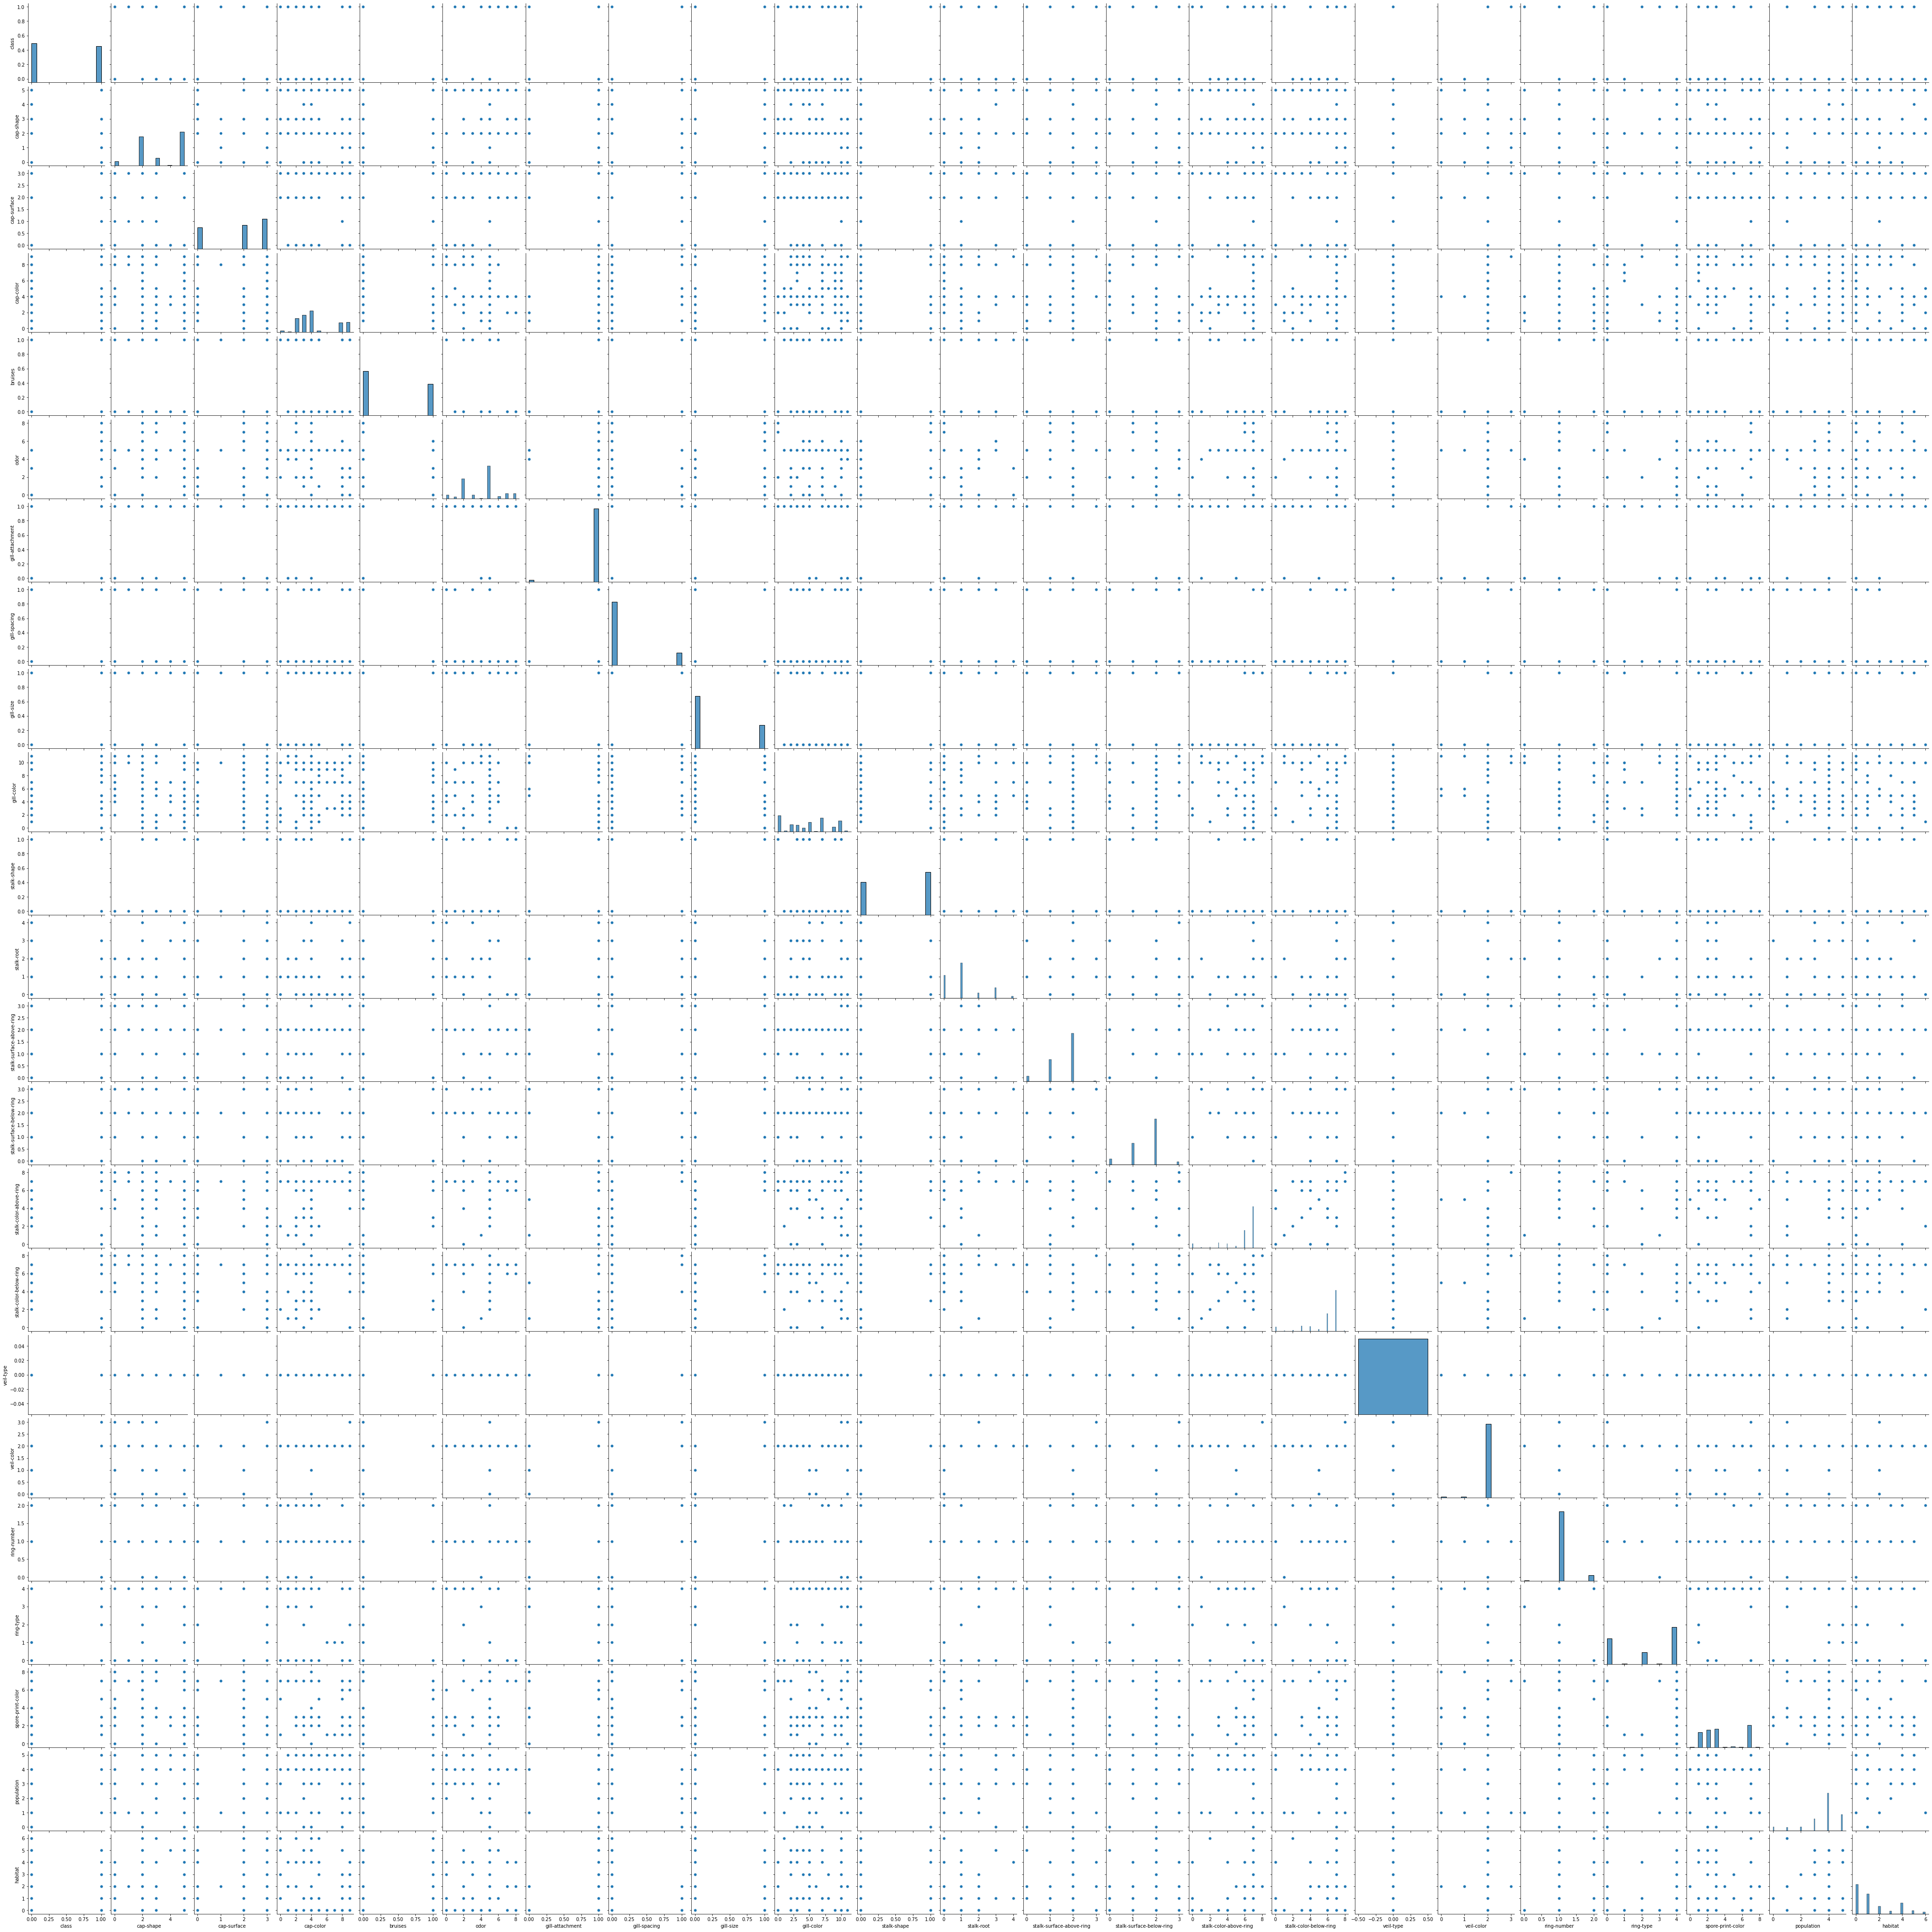

In [32]:
sns.pairplot(mushrooms)

In [26]:
y = mushrooms['class'].values
X = mushrooms.drop('class', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=100000).fit(X_train,y_train)
log.score(X_train,y_train)


0.9492926694837406

In [27]:
y_pred = log.predict(X_test)
log.score(X_test,y_test)

0.9511376352107422

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4 , min_samples_leaf=3).fit(X_train,y_train)
tree.score(X_train,y_train)

0.9768510012860555

In [29]:
y_pred = tree.predict(X_test)
tree.score(X_test , y_test)

0.9798582618425961

In [30]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(max_depth=8 , n_estimators=100 , min_samples_leaf=3).fit(X_train,y_train)
rand.score(X_train,y_train)

1.0

In [31]:
y_pred = rand.predict(X_test)
rand.score(X_test,y_test)


1.0